In [25]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd


LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
# Get ArtemisBLEController object
ble = get_ble_controller()
# Connect to the Artemis Device
ble.connect()

2024-04-17 12:28:37,702 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:42:30:78:92:49


2024-04-17 12:28:41,566 | INFO     |: Connected to c0:42:30:78:92:49


In [126]:
timeData = []
yawData = []
yawErrorData = []

In [127]:
def mapping_pid_control_notification_handler(uuid, char_bytearr):
    global timeData, yawData, yawErrorData
    string = ble.bytearray_to_string(char_bytearr)
    parts = string.split("|")  
    print(parts)
    timeData.append(int(parts[0][2:]))
    yawData.append(float(parts[1][4:]))
    yawErrorData.append(float(parts[2][7:]))

In [128]:
ble.start_notify(ble.uuid["RX_STRING"], mapping_pid_control_notification_handler)

In [129]:
ble.send_command(CMD.PID_STATUS_INI, "1")

In [130]:
# orientation control
# ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|3|0.2|17")
# ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|4|0.8|20")
# ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|2.5|0.8|17")


# ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|4.5|0.08|1")
ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|3|0.008|0.2")



In [131]:
ble.send_command(CMD.PID_ANGLE_INCREMENT, "")

In [94]:
# # send continuous PID control readings
# ble.send_command(CMD.SEND_PID_ANGLE_INCREMENT_DEBUG_READINGS, "0")

['T:5', 'Yaw:0.2', 'YawErr:20.1']
['T:21', 'Yaw:0.3', 'YawErr:20.2']
['T:33', 'Yaw:0.709', 'YawErr:19.290']
['T:66', 'Yaw:2.485', 'YawErr:17.514']
['T:83', 'Yaw:5.735', 'YawErr:14.264']
['T:113', 'Yaw:10.798', 'YawErr:9.200']
['T:146', 'Yaw:14.917', 'YawErr:5.82']
['T:167', 'Yaw:20.55', 'YawErr:0.55']
['T:1211', 'Yaw:0.312', 'YawErr:20.1']
['T:1232', 'Yaw:0.60', 'YawErr:19.749']
['T:1262', 'Yaw:1.674', 'YawErr:18.13']
['T:1289', 'Yaw:3.932', 'YawErr:15.755']
['T:1312', 'Yaw:6.440', 'YawErr:13.247']
['T:1339', 'Yaw:9.96', 'YawErr:10.591']
['T:1360', 'Yaw:13.396', 'YawErr:6.291']
['T:1392', 'Yaw:16.2', 'YawErr:3.685']
['T:1410', 'Yaw:19.680', 'YawErr:0.7']
['T:2458', 'Yaw:0.250', 'YawErr:20.0']
['T:2475', 'Yaw:0.185', 'YawErr:19.564']
['T:2505', 'Yaw:2.277', 'YawErr:17.473']
['T:2536', 'Yaw:5.800', 'YawErr:13.950']
['T:2573', 'Yaw:9.150', 'YawErr:10.600']
['T:2596', 'Yaw:13.424', 'YawErr:6.326']
['T:2619', 'Yaw:17.121', 'YawErr:2.628']
['T:2647', 'Yaw:17.714', 'YawErr:2.36']
['T:2671', '

In [95]:
# print(len(timeData))
# print(len(yawData))
# print(len(yawErrorData))
# print(yawData)

500
500
500
[0.2, 0.3, 0.709, 2.485, 5.735, 10.798, 14.917, 20.55, 0.312, 0.6, 1.674, 3.932, 6.44, 9.96, 13.396, 16.2, 19.68, 0.25, 0.185, 2.277, 5.8, 9.15, 13.424, 17.121, 17.714, 17.213, 17.103, 19.44, 0.0, 0.144, 1.956, 3.509, 6.564, 12.279, 17.272, 20.233, 0.313, 0.339, 2.343, 3.922, 6.189, 8.684, 11.308, 13.574, 15.768, 19.219, 0.311, 0.78, 0.225, 1.189, 2.627, 4.309, 7.355, 9.9, 13.221, 17.533, 21.889, 22.9, 20.609, 0.63, 0.338, 2.31, 3.827, 6.963, 10.803, 14.839, 19.43, 0.125, 0.126, 1.893, 4.87, 7.231, 10.127, 13.12, 15.86, 19.467, 0.61, 0.798, 2.686, 5.817, 10.109, 13.36, 17.786, 20.235, 0.62, 0.556, 2.292, 4.666, 7.23, 10.783, 14.54, 19.21, 0.126, 0.767, 2.246, 4.52, 5.837, 7.827, 9.798, 12.49, 15.236, 17.953, 18.329, 17.339, 17.51, 19.34, 0.314, 0.388, 2.303, 3.763, 5.782, 8.846, 13.66, 16.874, 19.802, 0.126, 0.473, 1.571, 3.945, 5.959, 8.356, 12.332, 15.505, 18.939, 0.125, 0.211, 1.384, 3.5, 6.332, 9.295, 12.771, 16.988, 19.965, 0.125, 0.296, 1.826, 3.386, 5.372, 7.864, 10.

In [96]:
# unused_index_arr = np.argwhere(np.array(timeData)==0)
# if (len(unused_index_arr) != 0):
#     unused_index = unused_index_arr[0][0]
# else:
#     unused_index = len(timeData)
# print(unused_index)

182


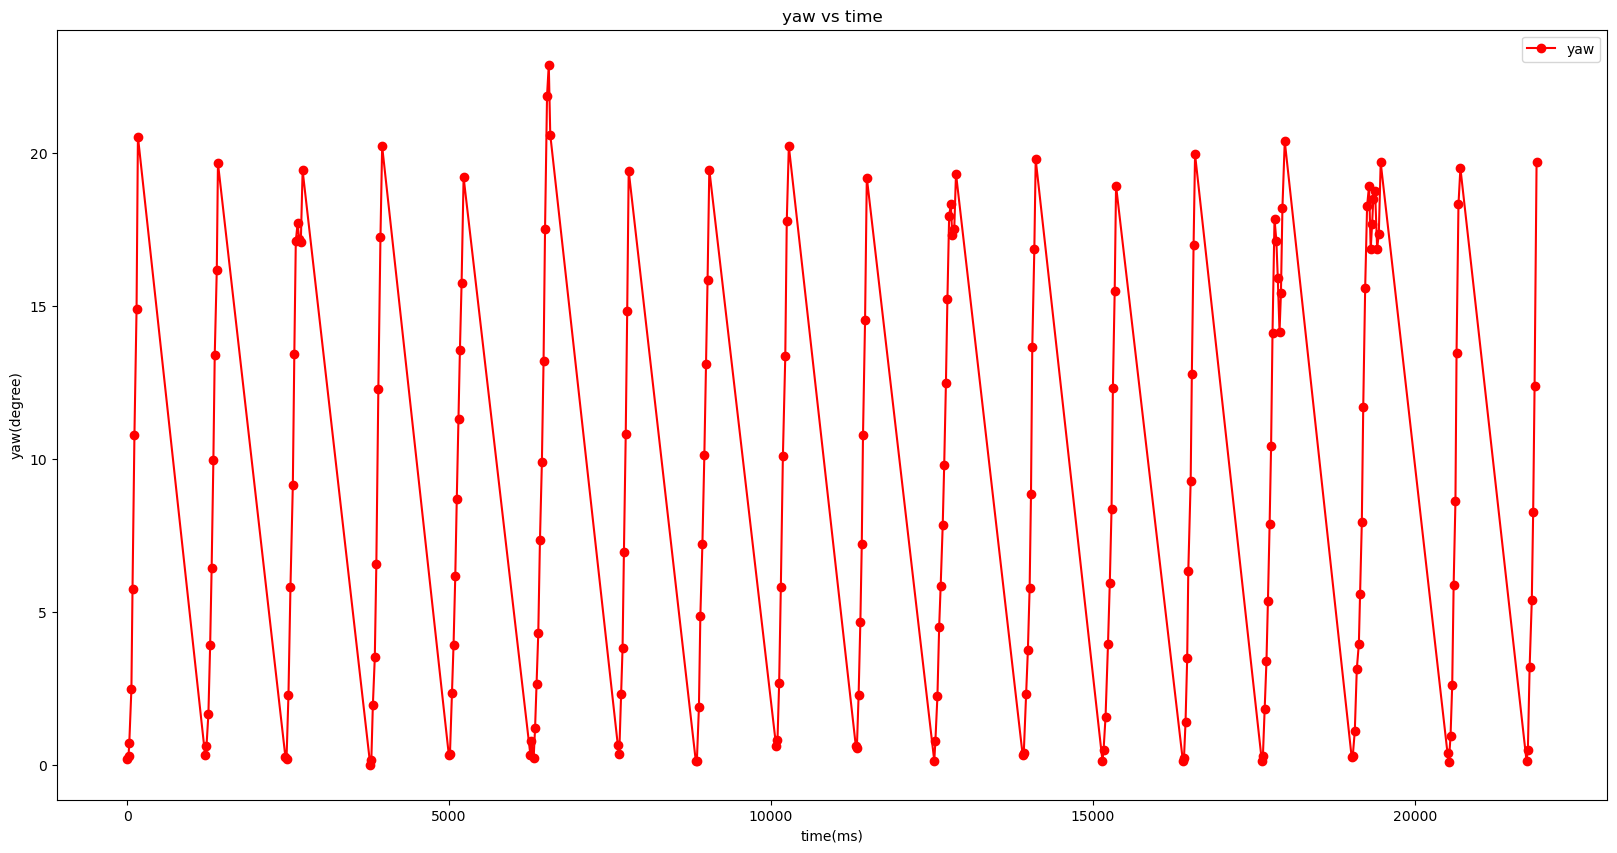

In [97]:
# # plot yaw vs time
# plt.figure(figsize=(20,10))
# plt.plot(np.array(timeData)[:unused_index], np.array(yawData)[:unused_index], linestyle='-', marker='o', color='red', label='yaw')
# plt.title("yaw vs time")
# plt.xlabel("time(ms)")
# plt.ylabel("yaw(degree)")
# plt.legend()
# plt.show()

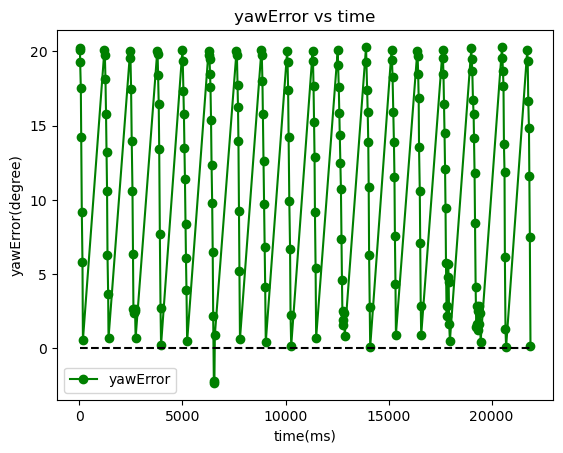

In [98]:
# # plot yawerror vs time
# # plt.figure(figsize=(15, 10))
# plt.plot(np.array(timeData)[:unused_index], np.array(yawErrorData)[:unused_index], linestyle='-', marker='o', color='green', label='yawError')
# plt.plot(np.array(timeData)[:unused_index], np.zeros((len(timeData)))[:unused_index], linestyle='--', color='black')
# plt.title("yawError vs time")
# plt.xlabel("time(ms)")
# plt.ylabel("yawError(degree)")
# plt.legend()
# plt.show()

In [132]:
# ble.stop_notify(ble.uuid["RX_STRING"])

In [133]:
robot_angles = []
tof1_mapping_readings = []
tof2_mapping_readings = []

In [134]:
def mapping_final_angle_notification_handler(uuid, char_bytearr):
    global robot_angles, tof1_mapping_readings, tof2_mapping_readings
    string = ble.bytearray_to_string(char_bytearr)
    parts = string.split("|")  
    print(parts)
    robot_angles.append(float(parts[0][4:]))
    tof1_mapping_readings.append(float(parts[1][5:]))
    tof2_mapping_readings.append(float(parts[2][5:]))
    

In [135]:
ble.start_notify(ble.uuid["RX_STRING"], mapping_final_angle_notification_handler)

In [136]:
# send finalized angles for each increment
ble.send_command(CMD.SEND_PID_ANGLE_INCREMENT_DEBUG_READINGS, "1")

['Yaw:20.387', 'Tof1:766.0', 'Tof2:614.0']
['Yaw:39.332', 'Tof1:844.0', 'Tof2:646.0']
['Yaw:60.455', 'Tof1:913.0', 'Tof2:619.0']
['Yaw:80.83', 'Tof1:724.0', 'Tof2:871.0']
['Yaw:100.169', 'Tof1:653.0', 'Tof2:741.0']
['Yaw:119.108', 'Tof1:731.0', 'Tof2:820.0']
['Yaw:140.202', 'Tof1:884.0', 'Tof2:928.0']
['Yaw:159.521', 'Tof1:732.0', 'Tof2:727.0']
['Yaw:179.428', 'Tof1:686.0', 'Tof2:682.0']
['Yaw:199.503', 'Tof1:673.0', 'Tof2:673.0']
['Yaw:219.232', 'Tof1:873.0', 'Tof2:819.0']
['Yaw:239.398', 'Tof1:918.0', 'Tof2:894.0']
['Yaw:259.254', 'Tof1:743.0', 'Tof2:806.0']
['Yaw:279.423', 'Tof1:862.0', 'Tof2:701.0']
['Yaw:299.283', 'Tof1:2379.0', 'Tof2:729.0']
['Yaw:319.636', 'Tof1:1834.0', 'Tof2:825.0']
['Yaw:340.676', 'Tof1:2143.0', 'Tof2:917.0']
['Yaw:360.787', 'Tof1:981.0', 'Tof2:690.0']


In [137]:
print(len(robot_angles))
print(np.shape(tof1_mapping_readings))
print(np.shape(tof2_mapping_readings))

18
(18,)
(18,)


In [138]:
# generate a table for comparing the angles
iteration = np.arange(0, 18)
set_angles = np.array(iteration*20 + 20)
robot_angles = np.array(robot_angles)
comparison_table = np.vstack((iteration, set_angles, robot_angles)).transpose()
print(comparison_table)

[[  0.     20.     20.387]
 [  1.     40.     39.332]
 [  2.     60.     60.455]
 [  3.     80.     80.83 ]
 [  4.    100.    100.169]
 [  5.    120.    119.108]
 [  6.    140.    140.202]
 [  7.    160.    159.521]
 [  8.    180.    179.428]
 [  9.    200.    199.503]
 [ 10.    220.    219.232]
 [ 11.    240.    239.398]
 [ 12.    260.    259.254]
 [ 13.    280.    279.423]
 [ 14.    300.    299.283]
 [ 15.    320.    319.636]
 [ 16.    340.    340.676]
 [ 17.    360.    360.787]]


In [139]:
# two tof readings & theta
# use gyr for IMU -> tof2 starts from -90
# tof1_angle: [ 20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340 360]
# tof2_angle: [-70 -50 -30 -10  10  30  50  70  90 110 130 150 170 190 210 230 250 270]
# tof1_angle = np.arange(1, 19) * 20
tof1_angle = robot_angles
tof2_angle = tof1_angle - 90
for i in range(18):
    if tof2_angle[i] < 0:
        tof2_angle[i] = 360 + tof2_angle[i]

tof1_angle_table = np.vstack((tof1_angle, tof1_mapping_readings)).transpose()
tof2_angle_table = np.vstack((tof2_angle, tof2_mapping_readings)).transpose()
print(tof1_angle_table)
# print(tof2_angle_table)


[[  20.387  766.   ]
 [  39.332  844.   ]
 [  60.455  913.   ]
 [  80.83   724.   ]
 [ 100.169  653.   ]
 [ 119.108  731.   ]
 [ 140.202  884.   ]
 [ 159.521  732.   ]
 [ 179.428  686.   ]
 [ 199.503  673.   ]
 [ 219.232  873.   ]
 [ 239.398  918.   ]
 [ 259.254  743.   ]
 [ 279.423  862.   ]
 [ 299.283 2379.   ]
 [ 319.636 1834.   ]
 [ 340.676 2143.   ]
 [ 360.787  981.   ]]


2024-04-17 12:35:34,971 | INFO     |: Disconnected from 1EF8FB8D-1A06-FB11-4002-B52B84BE3598


In [304]:
# # sort the tof2 order
# tof2_angle_table = tof2_angle_table[np.argsort(tof2_angle_table[:, 0])]
# print(tof2_angle_table)

[[  10.174 1096.   ]
 [  29.575 1167.   ]
 [  49.829  527.   ]
 [  69.473  510.   ]
 [  89.452 1148.   ]
 [ 110.409 1238.   ]
 [ 129.609  679.   ]
 [ 149.146  505.   ]
 [ 170.506  428.   ]
 [ 189.166  375.   ]
 [ 209.571  413.   ]
 [ 228.955  519.   ]
 [ 249.311  447.   ]
 [ 270.684  398.   ]
 [ 289.156  404.   ]
 [ 309.387  479.   ]
 [ 329.207  559.   ]
 [ 349.727  921.   ]]


2024-04-15 22:36:13,279 | INFO     |: Disconnected from 1EF8FB8D-1A06-FB11-4002-B52B84BE3598


In [150]:

# read the data from saved csv files
p1_tof1_1 = []
p1_tof1_2 = []
p2_tof1_1 = []
p2_tof1_2 = []
p3_tof1_1 = []
p3_tof1_2 = []
p4_tof1_1 = []
p4_tof1_2 = []
p5_tof1_1 = []
p5_tof1_2 = []
data_arrays = [p1_tof1_1, p1_tof1_2, p2_tof1_1, p2_tof1_2, p3_tof1_1, p3_tof1_2, p4_tof1_1, p4_tof1_2, p5_tof1_1, p5_tof1_2]

# Loop through the point and reading indices
for point in range(1, 6):   # 1,2,3,4,5
    for reading in range(1, 3):#1,2
        filename = f"./mapping_data/tof1/point{point}_tof1_{reading}.csv"
        # Read each CSV file
        df = pd.read_csv(filename)
        index = (point-1)*2 + reading - 1
        data_arrays[index].append(df.to_numpy())
        data_arrays[index] = np.array(data_arrays[index]).reshape(-1, 2)
print(np.shape(p1_tof1_1))
print(p1_tof1_1)


(1, 18, 2)
[array([[  19.302,  419.   ],
       [  40.3  ,  505.   ],
       [  59.204,  572.   ],
       [  79.681,  719.   ],
       [  99.472,  678.   ],
       [ 119.608,  715.   ],
       [ 139.74 ,  876.   ],
       [ 159.705, 2469.   ],
       [ 179.8  , 1915.   ],
       [ 199.303, 1700.   ],
       [ 219.132, 2215.   ],
       [ 239.77 , 1409.   ],
       [ 259.705,  766.   ],
       [ 279.19 , 1083.   ],
       [ 300.25 , 1795.   ],
       [ 318.923,  764.   ],
       [ 339.319,  570.   ],
       [ 359.827,  453.   ]])]


In [151]:
# Initialize the data_arrays list with None to reserve space for 10 groups of readings
data_arrays = [None] * 10

# Loop through the point and reading indices
for point in range(1, 6):   # 1,2,3,4,5
    for reading in range(1, 3): # 1,2
        filename = f"./mapping_data/tof1/point{point}_tof1_{reading}.csv"
        # Read each CSV file
    
        df = pd.read_csv(filename)
        index = (point - 1) * 2 + (reading - 1)
        # Directly store the NumPy array with shape (-1, 2)
        data_arrays[index] = df.to_numpy()

# Assign the numpy arrays to the individual variables
p1_tof1_1, p1_tof1_2, p2_tof1_1, p2_tof1_2, p3_tof1_1, p3_tof1_2, p4_tof1_1, p4_tof1_2, p5_tof1_1, p5_tof1_2 = data_arrays

print(np.shape(p1_tof1_1))


(18, 2)


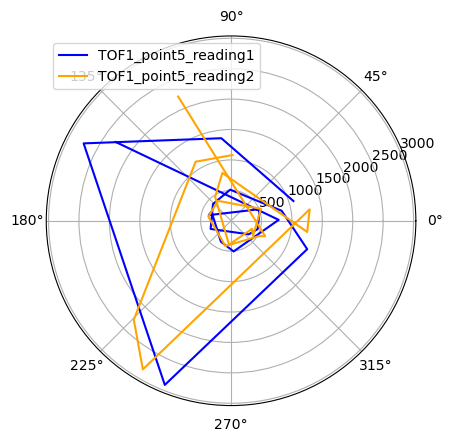

In [162]:
# plot the polar coordinates
point = 5 # 1,2,3,4,5
reading_1 = 1 # 1, 2
index_1 = (point-1)*2 + reading_1 - 1
plot_data_1 = data_arrays[index_1]

reading_2 = 2
index_2 = (point-1)*2 + reading_2 - 1
plot_data_2 = data_arrays[index_2]

plt.polar(plot_data_1[:, 0], plot_data_1[:, 1], color="blue", label=f"TOF1_point{point}_reading{reading_1}") 
plt.polar(plot_data_2[:, 0], plot_data_2[:, 1], color="orange", label=f"TOF1_point{point}_reading{reading_2}") 
plt.legend(loc="upper left")
plt.show()

In [ ]:
# test module

plt.polar(plot_data_1[:, 0], plot_data_1[:, 1], color="blue", label=f"TOF1_point{point}_reading{reading_1}") 
plt.polar(plot_data_2[:, 0], plot_data_2[:, 1], color="orange", label=f"TOF1_point{point}_reading{reading_2}") 
plt.legend(loc="upper left")
plt.show()

In [154]:
# transform into 2D Cartesian coordinates
reading_1 = 1 
reading_2 = 2
tile_length = 304.8 # mm
# point1
point = 1 # 1,2,3,4,5
dx_1, dy_1 = 0, 3*tile_length
index_1_1 = (point-1)*2 + reading_1 - 1
index_1_2 = (point-1)*2 + reading_2 - 1
angle_1_1 = np.deg2rad(data_arrays[index_1_1][:, 0]) # in rad
x_1_1 = -data_arrays[index_1_1][:, 1] * np.sin(angle_1_1)
y_1_1 = data_arrays[index_1_1][:, 1] * np.cos(angle_1_1)
angle_1_2 = np.deg2rad(data_arrays[index_1_2][:, 0]) # in rad
x_1_2 = -data_arrays[index_1_2][:, 1] * np.sin(angle_1_2)
y_1_2 = data_arrays[index_1_2][:, 1] * np.cos(angle_1_2)

# point2
point = 2 # 1,2,3,4,5
dx_2, dy_2 = 5*tile_length, 3*tile_length
index_2_1 = (point-1)*2 + reading_1 - 1
index_2_2 = (point-1)*2 + reading_2 - 1
angle_2_1 = np.deg2rad(data_arrays[index_2_1][:, 0]) # in rad
x_2_1 = -data_arrays[index_2_1][:, 1] * np.sin(angle_2_1)
y_2_1 = data_arrays[index_2_1][:, 1] * np.cos(angle_2_1)
angle_2_2 = np.deg2rad(data_arrays[index_2_2][:, 0]) # in rad
x_2_2 = -data_arrays[index_2_2][:, 1] * np.sin(angle_2_2)
y_2_2 = data_arrays[index_2_2][:, 1] * np.cos(angle_2_2)

# point3
point = 3 # 1,2,3,4,5
dx_3, dy_3 = 0, 0*tile_length
index_3_1 = (point-1)*2 + reading_1 - 1
index_3_2 = (point-1)*2 + reading_2 - 1
angle_3_1 = np.deg2rad(data_arrays[index_3_1][:, 0]) # in rad
x_3_1 = -data_arrays[index_3_1][:, 1] * np.sin(angle_3_1)
y_3_1 = data_arrays[index_3_1][:, 1] * np.cos(angle_3_1)
angle_3_2 = np.deg2rad(data_arrays[index_3_2][:, 0]) # in rad
x_3_2 = -data_arrays[index_3_2][:, 1] * np.sin(angle_3_2)
y_3_2 = data_arrays[index_3_2][:, 1] * np.cos(angle_3_2)

# point4
point = 4 # 1,2,3,4,5
dx_4, dy_4 = -3*tile_length, -2*tile_length
index_4_1 = (point-1)*2 + reading_1 - 1
index_4_2 = (point-1)*2 + reading_2 - 1
angle_4_1 = np.deg2rad(data_arrays[index_4_1][:, 0]) # in rad
x_4_1 = -data_arrays[index_4_1][:, 1] * np.sin(angle_4_1)
y_4_1 = data_arrays[index_4_1][:, 1] * np.cos(angle_4_1)
angle_4_2 = np.deg2rad(data_arrays[index_4_2][:, 0]) # in rad
x_4_2 = -data_arrays[index_4_2][:, 1] * np.sin(angle_4_2)
y_4_2 = data_arrays[index_4_2][:, 1] * np.cos(angle_4_2)

# point5
point = 5 # 1,2,3,4,5
dx_5, dy_5 = 5*tile_length, -3*tile_length
index_5_1 = (point-1)*2 + reading_1 - 1
index_5_2 = (point-1)*2 + reading_2 - 1
angle_5_1 = np.deg2rad(data_arrays[index_5_1][:, 0]) # in rad
x_5_1 = -data_arrays[index_5_1][:, 1] * np.sin(angle_5_1)
y_5_1 = data_arrays[index_5_1][:, 1] * np.cos(angle_5_1)
angle_5_2 = np.deg2rad(data_arrays[index_5_2][:, 0]) # in rad
x_5_2 = -data_arrays[index_5_2][:, 1] * np.sin(angle_5_2)
y_5_2 = data_arrays[index_5_2][:, 1] * np.cos(angle_5_2)


In [155]:
def translation(x, y, dx, dy):
    translation_matrix = np.array([[1, 0, dx],
                                    [0, 1, dy],
                                    [0, 0, 1]])
    homogenous_coordinates = np.vstack([x, y, np.ones(len(x))])
    translated_points = translation_matrix @ homogenous_coordinates
    translated_x = translated_points[0, :]
    translated_y = translated_points[1, :]
    return translated_x, translated_y

In [156]:
#p1
translated_x_1_1, translated_y_1_1 = translation(x_1_1, y_1_1, dx_1, dy_1)
translated_x_1_2, translated_y_1_2 = translation(x_1_2, y_1_2, dx_1, dy_1)

#p2
translated_x_2_1, translated_y_2_1 = translation(x_2_1, y_2_1, dx_2, dy_2)
translated_x_2_2, translated_y_2_2 = translation(x_2_2, y_2_2, dx_2, dy_2)

#p3
translated_x_3_1, translated_y_3_1 = translation(x_3_1, y_3_1, dx_3, dy_3)
translated_x_3_2, translated_y_3_2 = translation(x_3_2, y_3_2, dx_3, dy_3)

#p4
translated_x_4_1, translated_y_4_1 = translation(x_4_1, y_4_1, dx_4, dy_4)
translated_x_4_2, translated_y_4_2 = translation(x_4_2, y_4_2, dx_4, dy_4)

#p5
translated_x_5_1, translated_y_5_1 = translation(x_5_1, y_5_1, dx_5, dy_5)
translated_x_5_2, translated_y_5_2 = translation(x_5_2, y_5_2, dx_5, dy_5)


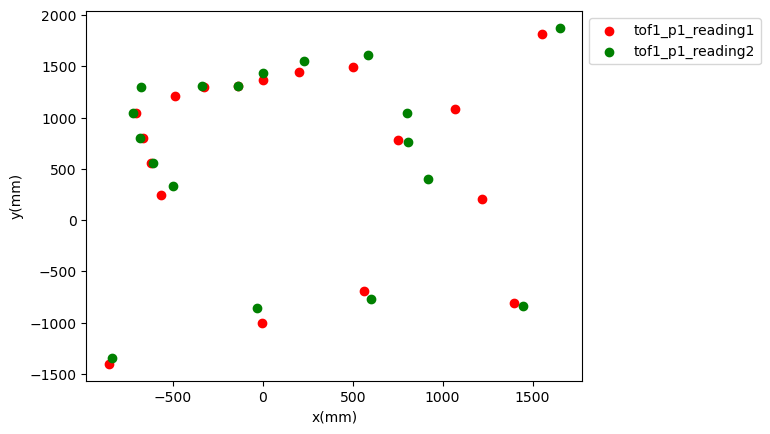

In [157]:
# plot one-by-one
plt.scatter(translated_x_1_1, translated_y_1_1, color="red", label="tof1_p1_reading1")
plt.scatter(translated_x_1_2, translated_y_1_2, color="green", label="tof1_p1_reading2")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("x(mm)")
plt.ylabel("y(mm)")
plt.show()


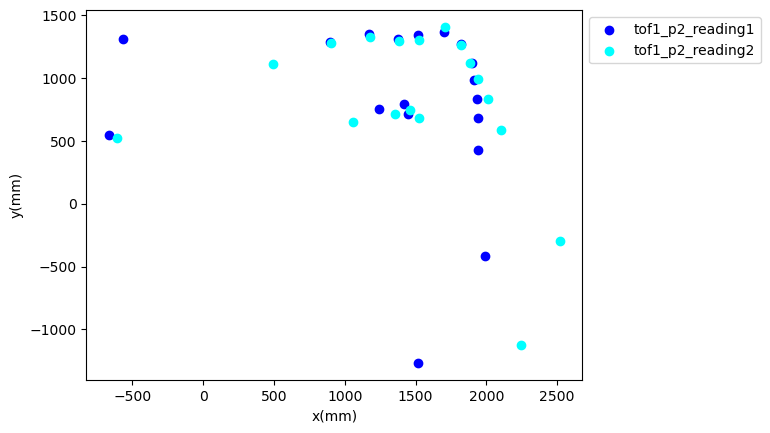

In [163]:

plt.scatter(translated_x_2_1, translated_y_2_1, color="blue", label="tof1_p2_reading1")
plt.scatter(translated_x_2_2, translated_y_2_2, color="cyan", label="tof1_p2_reading2")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("x(mm)")
plt.ylabel("y(mm)")
plt.show()


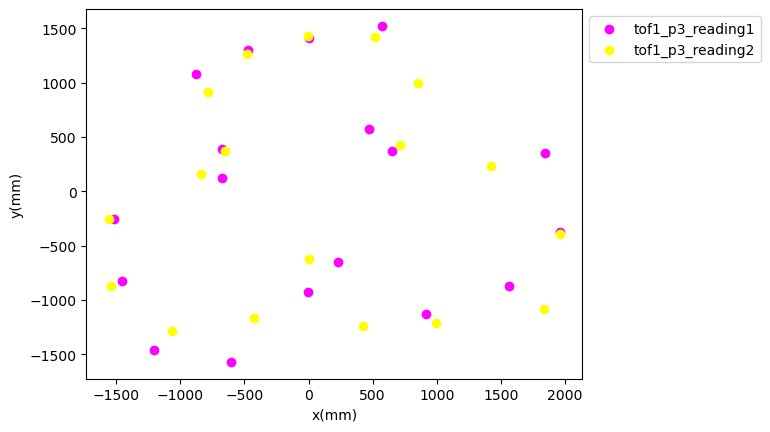

In [164]:

plt.scatter(translated_x_3_1, translated_y_3_1, color="magenta", label="tof1_p3_reading1")
plt.scatter(translated_x_3_2, translated_y_3_2, color="yellow", label="tof1_p3_reading2")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("x(mm)")
plt.ylabel("y(mm)")
plt.show()


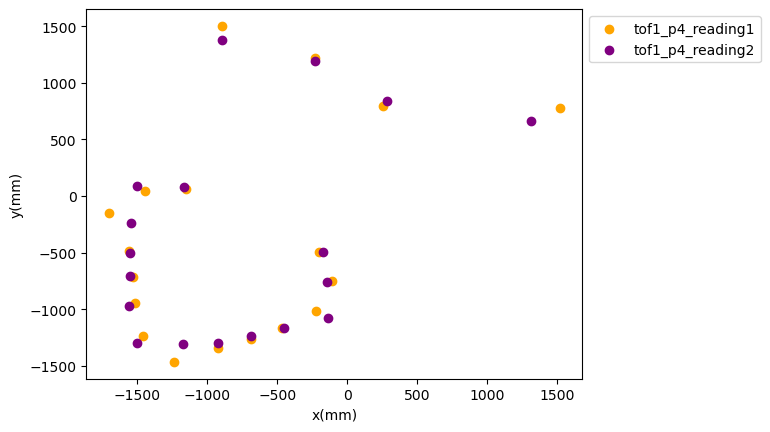

In [165]:

plt.scatter(translated_x_4_1, translated_y_4_1, color="orange", label="tof1_p4_reading1")
plt.scatter(translated_x_4_2, translated_y_4_2, color="purple", label="tof1_p4_reading2")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("x(mm)")
plt.ylabel("y(mm)")
plt.show()


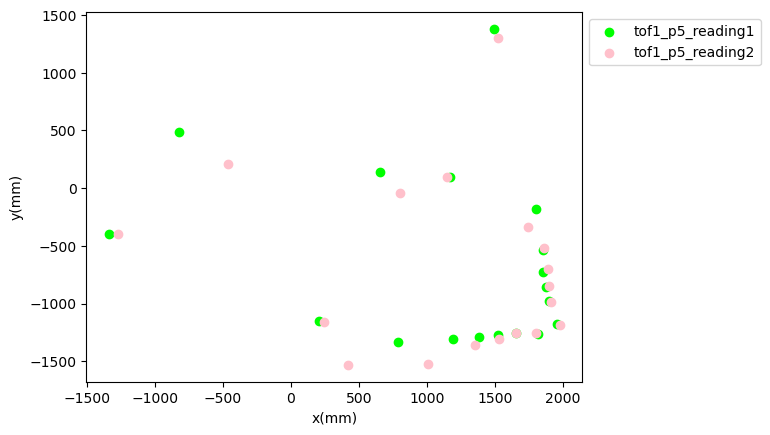

In [166]:

plt.scatter(translated_x_5_1, translated_y_5_1, color="lime", label="tof1_p5_reading1")
plt.scatter(translated_x_5_2, translated_y_5_2, color="pink", label="tof1_p5_reading2")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("x(mm)")
plt.ylabel("y(mm)")
plt.show()

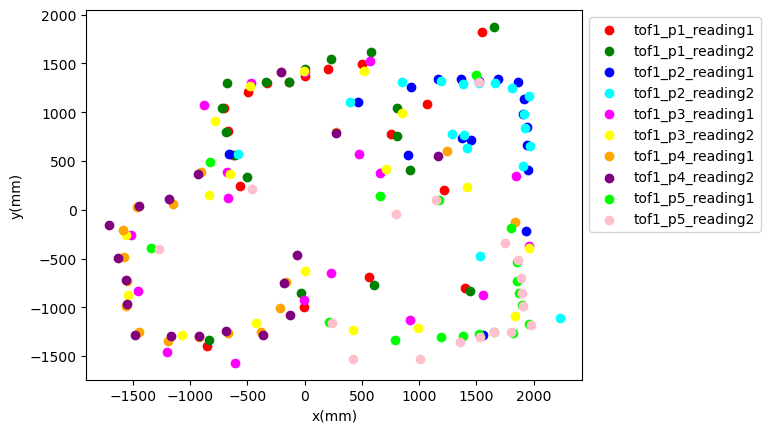

In [146]:
# plot together
plt.scatter(translated_x_1_1, translated_y_1_1, color="red", label="tof1_p1_reading1")
plt.scatter(translated_x_1_2, translated_y_1_2, color="green", label="tof1_p1_reading2")

plt.scatter(translated_x_2_1, translated_y_2_1, color="blue", label="tof1_p2_reading1")
plt.scatter(translated_x_2_2, translated_y_2_2, color="cyan", label="tof1_p2_reading2")

plt.scatter(translated_x_3_1, translated_y_3_1, color="magenta", label="tof1_p3_reading1")
plt.scatter(translated_x_3_2, translated_y_3_2, color="yellow", label="tof1_p3_reading2")

plt.scatter(translated_x_4_1, translated_y_4_1, color="orange", label="tof1_p4_reading1")
plt.scatter(translated_x_4_2, translated_y_4_2, color="purple", label="tof1_p4_reading2")

plt.scatter(translated_x_5_1, translated_y_5_1, color="lime", label="tof1_p5_reading1")
plt.scatter(translated_x_5_2, translated_y_5_2, color="pink", label="tof1_p5_reading2")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("x(mm)")
plt.ylabel("y(mm)")
plt.show()